# Data Mining - Homework 4
## Mohammad Bahrami - 9724133
### Question 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Part a

In [3]:
dataset = pd.read_csv('Wholesale customers data.csv')
dataset.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There are no `Nan` Values in the dataset.

#### Part b

In [4]:
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
dataset.loc[:, numeric_columns] = dataset.loc[:, numeric_columns].apply(
    lambda z: (z - z.mean()) / z.std()
)

In [5]:
dataset = dataset.drop(
    index=dataset.loc[((dataset.loc[:, numeric_columns] > 3) | (dataset.loc[:, numeric_columns] < -3)).any(axis=1)].index
).reset_index(drop=True)

#### Part c

Already Done.

#### Part d

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(dataset)
pca_df = pd.DataFrame(pca.transform(dataset))

#### Part e

In [7]:
from sklearn.cluster import KMeans
max_k = 15
sse_list = []
for k in range(1, max_k + 1):
    clusterer = KMeans(n_clusters=k).fit(pca_df)
    sse_list.append(clusterer.inertia_)

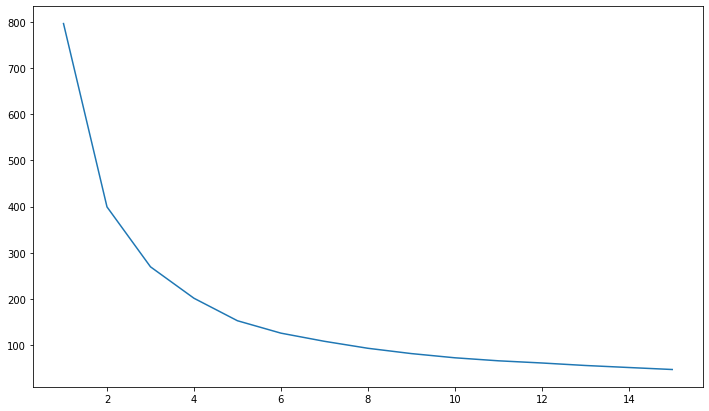

In [8]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, max_k + 1),
    sse_list
)
fig.set_size_inches((12, 7))

There is no clear elbow in the figure but i would choose 4 or 5 as the right value for K.


#### Part f

In [13]:
import kneed
kneedle = kneed.KneeLocator(
    np.arange(1, max_k + 1),
    np.array(sse_list),
    curve='convex',
    direction='decreasing'
)
print(f'Elbow Location: {kneedle.elbow}')

Elbow Location: 4


#### Part g

In [16]:
best_clusterer = KMeans(n_clusters=kneedle.elbow).fit(pca_df)
clusters = best_clusterer.predict(pca_df)

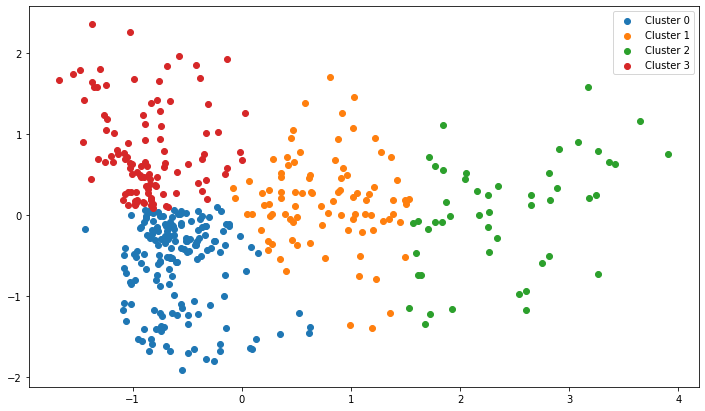

In [21]:
fig, ax = plt.subplots()
for c in range(kneedle.elbow):
    condition = clusters==c
    ax.scatter(
        pca_df.loc[condition, 0],
        pca_df.loc[condition, 1],
        label=f'Cluster {c}'
    )
ax.legend()
fig.set_size_inches((12, 7))

In [23]:
for c in range(kneedle.elbow):
    condition = clusters==c
    print(f'------------------ Cluster {c} ------------------')
    print(pca_df.loc[condition, :].describe())

------------------ Cluster 0 ------------------
                0           1
count  168.000000  168.000000
mean    -0.577562   -0.592396
std      0.333178    0.544060
min     -1.433159   -1.902395
25%     -0.796677   -1.066625
50%     -0.636932   -0.406267
75%     -0.403681   -0.152601
max      0.622654    0.096226
------------------ Cluster 1 ------------------
               0          1
count  92.000000  92.000000
mean    0.765654   0.166236
std     0.431370   0.549219
min    -0.076106  -1.388244
25%     0.411031  -0.074000
50%     0.777285   0.179579
75%     1.110472   0.455160
max     1.532639   1.707066
------------------ Cluster 2 ------------------
               0          1
count  49.000000  49.000000
mean    2.386434   0.023556
std     0.641908   0.692268
min     1.533960  -1.345603
25%     1.835962  -0.467161
50%     2.262253   0.126301
75%     2.821019   0.525282
max     3.905879   1.575735
------------------ Cluster 3 ------------------
                0           1
coun

We can see that for each cluster, the mean of the columns which shows the center of that cluster(centroid), it has enough distance with the other clusters. Also in all clusters, except for one, the variance of the data columns is relatively low.

to put things into perspective, the min and the max value of each cluster does not have too much intersection with other clusters. This means that all clusters are separated.